In [11]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]

N = 20
d0 = 2
C = 3

X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1)) 
  #r = np.linspace(j, j, N) + np.random.randn(N)*0.15# radius
  #t = np.linspace(0, 2 * np.pi, N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.random.multivariate_normal(means[j], cov, N).T
  y[ix] = j

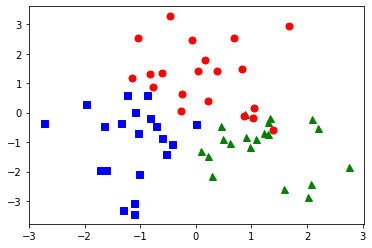

In [20]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
plt.show()

In [21]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [35]:
## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# cost or loss function  
def cost(Y, Yhat):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [49]:
def mynet(lam):
    d0 = 2
    d1 = h = 200 # size of hidden layer 
    d2 = C = 3
    Y = convert_labels(y, C)
    N = X.shape[1]
    eta = 1 # learning rate
    
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros((d1, 1))
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros((d2, 1))
    
    for it in range(10000):
        Z1 = np.dot(W1.T, X) + b1 
        A1 = np.maximum(Z1, 0)
        Z2 = np.dot(W2.T, A1) + b2

        Yhat = softmax(Z2)
        
        if it % 1000 == 0:
            RLoss = cost(Y, Yhat) + lam * (np.linalg.norm(W1)**2 + np.linalg.norm(W2)**2)
            print("iter: {},  R_Loss: {}".format(it, RLoss))

        # backpropagation
        E2 = (Yhat - Y )/N
        dW2 = np.dot(A1, E2.T) + lam*W2
        db2 = np.sum(E2, axis = 1, keepdims = True)
        E1 = np.dot(W2, E2)
        E1[Z1 <= 0] = 0 # gradient of ReLU 
        dW1 = np.dot(X, E1.T) + lam*W1
        db1 = np.sum(E1, axis = 1, keepdims = True)

        # Gradient Descent update 
        # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
        W1 += -eta*dW1 
        b1 += -eta*db1 
        W2 += -eta*dW2
        b2 += -eta*db2
        
    Z1 = np.dot(W1.T, X) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    predicted_class = np.argmax(Z2, axis=0)
    acc = (100*np.mean(predicted_class == y))
    print('training accuracy: %.2f %%' % acc)

    xm = np.arange(-3, 3, 0.025)
    ym = np.arange(-3, 3, 0.025)
    xlen = len(xm)
    ylen = len(ym)
    xx, yy = np.meshgrid(xm, ym)


    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # xx.ravel(), yy.ravel()

    print(np.ones((1, xx.size)).shape)
    xx1 = xx.ravel().reshape(1, xx.size)
    yy1 = yy.ravel().reshape(1, yy.size)

    # print(xx.shape, yy.shape)
    # XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

    X0 = np.vstack((xx1, yy1))

    # print(X.shape)

    Z1 = np.dot(W1.T, X0) + b1 
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    # predicted class 
    Z = np.argmax(Z2, axis=0)

    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

    # Plot also the training points
    # plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    # plt.xlabel('Sepal length')
    # plt.ylabel('Sepal width')

    # X = X.T
    N = 20
    print(N)


    plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
    plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
    plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
    # plt.axis('off')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xticks(())
    plt.yticks(())
    plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
    # plt.axis('equal')
    # display(X[1:, :], original_label)
    fn = 'ex_res'+ str(d1) + '.png'
    # plt.savefig(fn, bbox_inches='tight', dpi = 600)
    plt.show()

In [50]:
print("Visualize Data")
print("Visualize Result")

Visualize Data
Visualize Result


iter: 0,  R_Loss: 1.097795953365717
iter: 1000,  R_Loss: 0.09089064528178023
iter: 2000,  R_Loss: 0.054324088216673665
iter: 3000,  R_Loss: 0.02469652807574897
iter: 4000,  R_Loss: 0.01396553338487235
iter: 5000,  R_Loss: 0.007925906619742218
iter: 6000,  R_Loss: 0.005255758229833251
iter: 7000,  R_Loss: 0.0037524444464038815
iter: 8000,  R_Loss: 0.002828503889336314
iter: 9000,  R_Loss: 0.0022307414361771465
training accuracy: 100.00 %
(1, 57600)
20


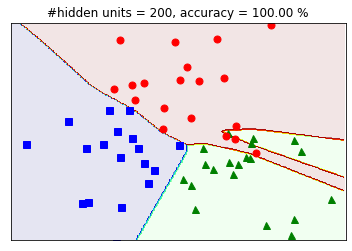

In [51]:
mynet(0)

iter: 0,  R_Loss: 1.0997618702252334
iter: 1000,  R_Loss: 0.15829818447351854
iter: 2000,  R_Loss: 0.1607100936417654
iter: 3000,  R_Loss: 0.1602971316534893
iter: 4000,  R_Loss: 0.15928502750900553
iter: 5000,  R_Loss: 0.16096747074164286
iter: 6000,  R_Loss: 0.1671895048827474
iter: 7000,  R_Loss: 0.16204744487986253
iter: 8000,  R_Loss: 0.16556072704141037
iter: 9000,  R_Loss: 0.16507623187837417
training accuracy: 98.33 %
(1, 57600)
20


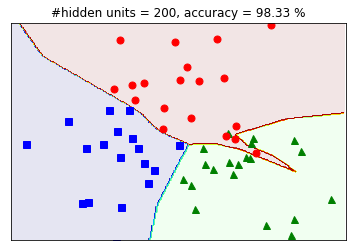

In [52]:
mynet(0.001)

iter: 0,  R_Loss: 1.1003568572644506
iter: 1000,  R_Loss: 0.33303785210838444
iter: 2000,  R_Loss: 0.3333956497149688
iter: 3000,  R_Loss: 0.3337494323680824
iter: 4000,  R_Loss: 0.3342304462556878
iter: 5000,  R_Loss: 0.3347236829346749
iter: 6000,  R_Loss: 0.33470330884371746
iter: 7000,  R_Loss: 0.334726800883622
iter: 8000,  R_Loss: 0.3346221944209396
iter: 9000,  R_Loss: 0.3348039367064612
training accuracy: 96.67 %
(1, 57600)
20


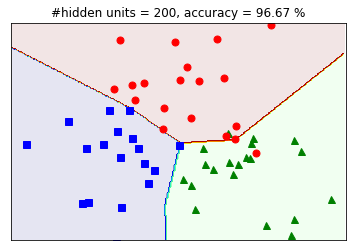

In [53]:
mynet(0.01)

iter: 0,  R_Loss: 1.1076265380728936
iter: 1000,  R_Loss: 0.8901726218701548
iter: 2000,  R_Loss: 0.8910328717567927
iter: 3000,  R_Loss: 0.8909334142375989
iter: 4000,  R_Loss: 0.8908938097278634
iter: 5000,  R_Loss: 0.8908190057264225
iter: 6000,  R_Loss: 0.8908631935257421
iter: 7000,  R_Loss: 0.890805628598938
iter: 8000,  R_Loss: 0.8907492538943722
iter: 9000,  R_Loss: 0.8908174078782536
training accuracy: 93.33 %
(1, 57600)
20


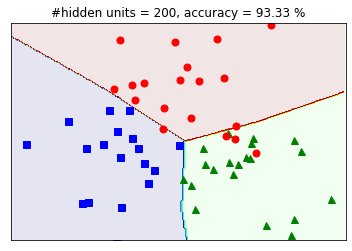

In [54]:
mynet(0.1)

iter: 0,  R_Loss: 1.1524096639575336
iter: 1000,  R_Loss: 1.226806893684658
iter: 2000,  R_Loss: 1.226806893684658
iter: 3000,  R_Loss: 1.226806893684658
iter: 4000,  R_Loss: 1.226806893684658
iter: 5000,  R_Loss: 1.226806893684658
iter: 6000,  R_Loss: 1.226806893684658
iter: 7000,  R_Loss: 1.226806893684658
iter: 8000,  R_Loss: 1.226806893684658
iter: 9000,  R_Loss: 1.226806893684658
training accuracy: 88.33 %
(1, 57600)
20


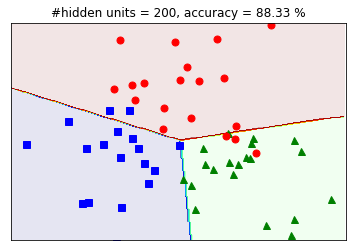

In [56]:
mynet(0.5)